In [368]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import requests
import pprint
import hvplot.pandas
from api_keys import geoapify_key
from api_keys import weather_api_key

crime_data_df = pd.read_csv("../Resources/hate_crime.csv", low_memory=False)

In [372]:
# Dropping columns that will not be used
clean_crime = crime_data_df.drop(columns=["ORI", "PUB_AGENCY_UNIT", "JUVENILE_VICTIM_COUNT","ADULT_VICTIM_COUNT", "ADULT_OFFENDER_COUNT", 'JUVENILE_OFFENDER_COUNT']).copy()

# Dropping "Guam", "Federal", "District of Columbia" from State df
state_drop = ["Guam", "Federal", "District of Columbia"]
final_crime_df = clean_crime[~clean_crime["STATE_NAME"].isin(state_drop)]
final_crime_df.head()

,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,Rogers,City,AR,Arkansas,West South Central,South,5,"Cities from 10,000 thru 24,999",...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,Hope,City,AR,Arkansas,West South Central,South,6,"Cities from 2,500 thru 9,999",...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [51]:
years_df = clean_crime[["STATE_NAME", 'DATA_YEAR','INCIDENT_DATE', 'STATE_ABBR', 'PUB_AGENCY_NAME','OFFENSE_NAME']].copy()

In [80]:
peak_year = clean_crime[clean_crime['DATA_YEAR'] == 2001]
max_state = peak_year[peak_year['STATE_NAME'] == "California"]
months = max_state['INCIDENT_DATE'].str.split("-", n = 2, expand = True)
offenses = max_state['OFFENSE_NAME'].value_counts().nlargest(5)
offenses

Intimidation                                817
Destruction/Damage/Vandalism of Property    548
Simple Assault                              514
Aggravated Assault                          245
Robbery                                      61
Name: OFFENSE_NAME, dtype: int64

In [81]:
months

,0,1,2
74138,01,FEB,01
74139,14,FEB,01
74140,18,MAY,01
74141,17,SEP,01
74142,19,SEP,01
...,...,...,...
76379,13,SEP,01
76380,29,AUG,01
76381,13,MAR,01
76382,24,APR,01


In [52]:
years_df.head()

,STATE_NAME,DATA_YEAR,INCIDENT_DATE,STATE_ABBR,PUB_AGENCY_NAME,OFFENSE_NAME
0,Arkansas,1991,31-AUG-91,AR,Rogers,Intimidation
1,Arkansas,1991,19-SEP-91,AR,Hope,Simple Assault
2,Arkansas,1991,04-JUL-91,AR,Pine Bluff,Aggravated Assault
3,Arkansas,1991,24-DEC-91,AR,Pine Bluff,Aggravated Assault;Destruction/Damage/Vandalis...
4,Arkansas,1991,23-DEC-91,AR,Pine Bluff,Aggravated Assault


In [76]:
# # making separate Month, Day, columns
max_state["DATA_DAY"]= months[0]
max_state["DATA_MONTH"]= months[1]

# # Dropping original Incedent Date column
max_state.drop(columns =["INCIDENT_DATE"], inplace = True)
max_state = max_state[['STATE_NAME','STATE_ABBR','PUB_AGENCY_NAME','DATA_YEAR',"DATA_MONTH","DATA_DAY",'OFFENSE_NAME']]

# display
max_state

/Users/danielacastellon/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/danielacastellon/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/danielacastellon/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyW

,STATE_NAME,STATE_ABBR,PUB_AGENCY_NAME,DATA_YEAR,DATA_MONTH,DATA_DAY,OFFENSE_NAME
74138,California,CA,Alameda,2001,FEB,01,Destruction/Damage/Vandalism of Property
74139,California,CA,Alameda,2001,FEB,14,Simple Assault
74140,California,CA,Alameda,2001,MAY,18,Destruction/Damage/Vandalism of Property
74141,California,CA,Alameda,2001,SEP,17,Intimidation
74142,California,CA,Alameda,2001,SEP,19,Intimidation
...,...,...,...,...,...,...,...
76379,California,CA,University of California:,2001,SEP,13,Destruction/Damage/Vandalism of Property
76380,California,CA,Yuba,2001,AUG,29,Destruction/Damage/Vandalism of Property
76381,California,CA,Yuba,2001,MAR,13,Aggravated Assault
76382,California,CA,Yuba,2001,APR,24,Intimidation


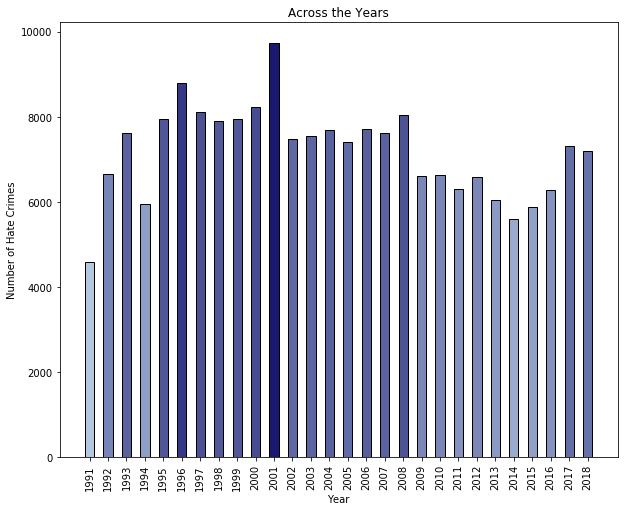

In [371]:
year_counts = years_df['DATA_YEAR'].value_counts().sort_values(ascending= True)
x = year_counts.index.values
ys = year_counts.values

plt.figure(figsize=(10, 8))

cmap = mcolors.LinearSegmentedColormap.from_list("", ["aliceblue", "lightsteelblue", "midnightblue"])

plt.bar(x, ys, align='center', color= cmap(year_counts.values/year_counts.values.max()), edgecolor = "black", width = .5, linewidth = 1)

plt.title("Across the Years")
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.xticks(x, rotation='vertical')
plt.show()

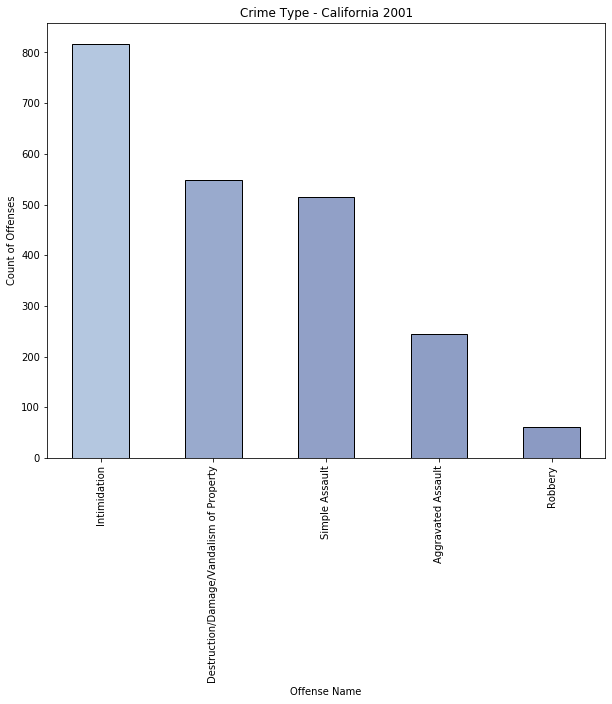

In [369]:
# changing it to be top 5

x = offenses.index.values
y = offenses.values

plt.figure(figsize=(10, 8))

plt.bar(x, y, align='center', color= cmap(year_counts.values/year_counts.values.max()), edgecolor = "black", width = .5, linewidth = 1)

plt.title("Crime Type - California 2001")
plt.xlabel('Offense Name')
plt.ylabel('Count of Offenses')
plt.xticks(x, rotation='vertical')
plt.show()

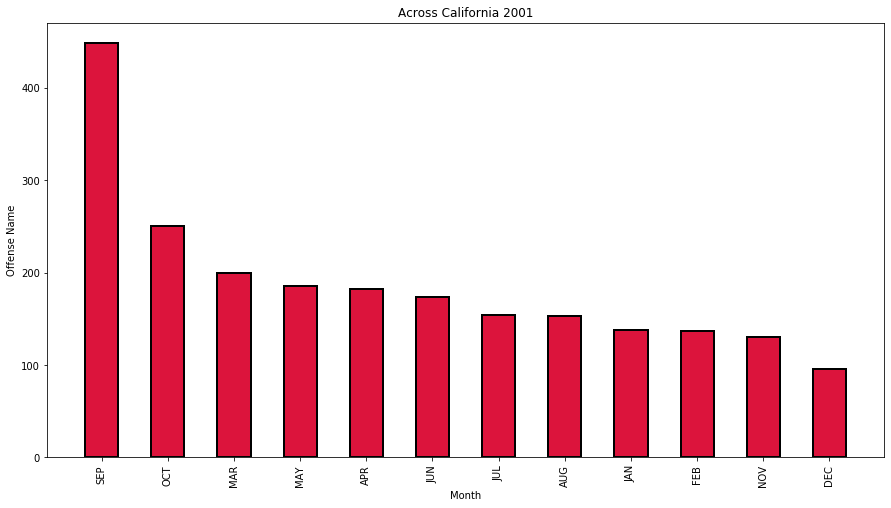

In [77]:
counts = max_state['DATA_MONTH'].value_counts()
x = counts.index.values
y = counts.values

plt.figure(figsize=(15, 8))

plt.bar(x, y, align='center', color='crimson', edgecolor="black", width= .5, linewidth=2)

plt.title("Across California 2001")
plt.xlabel('Month')
plt.ylabel('Offense Name')
plt.xticks(x, rotation='vertical')
plt.show()

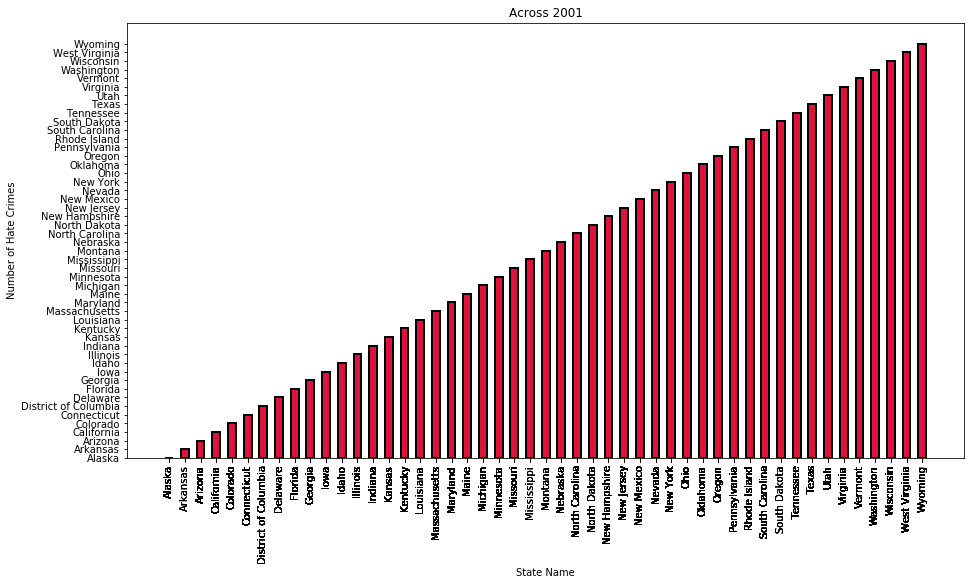

In [78]:
peak_year = years_df[years_df['DATA_YEAR'] == 2001]

names = peak_year['STATE_NAME']
state_counts = peak_year['STATE_NAME']

x = names
y = state_counts

plt.figure(figsize=(15, 8))

plt.bar(x, y, align='center', color='crimson', edgecolor="black", width= .5, linewidth=2)

plt.title("Across 2001")
plt.xlabel('State Name')
plt.ylabel('Number of Hate Crimes')
plt.xticks(x, rotation='vertical')
plt.show()

In [399]:
# Gathering LAT and LNG for each state to use in map
state_unique = final_crime_df["STATE_NAME"].unique()

# Set the API base URL
url = "https://api.geoapify.com/v1/geocode/search?country=United%20States%20of%20America"

# Define an empty list for data for each state
state_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in our list to fetch weather data
for state in state_unique:

    # Create endpoint URL with each city
    state_url = url + "&state="+ state + "&apiKey=" + geoapify_key
    
    # print(f"Processing Record for {state}")

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        state_info = requests.get(state_url).json()

        # Parse out latitude, longitude
        state_lat = state_info["features"][0]["properties"]["lat"]
        state_lng = state_info["features"][0]["properties"]["lon"]

        # Append the City information into city_data list
        state_data.append({"State": state, 
                          "Lat": state_lat, 
                          "Lng": state_lng})
# If an error is experienced, skip the city
    except:
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [400]:
state_data_df = pd.DataFrame(state_data) 
state_data_df.head()

,State,Lat,Lng
0,Arkansas,35.204888,-92.447911
1,Arizona,34.395342,-111.763275
2,California,36.701463,-118.755997
3,Colorado,38.725178,-105.607716
4,Connecticut,41.650020,-72.734216


In [388]:
# Showing top 10 offenses
offense_count = final_crime_df["OFFENSE_NAME"].value_counts().nlargest(10)
offense_clean = offense_count.reset_index()
offense_clean = offense_clean.rename(columns={"index": "OFFENSE_NAME", "OFFENSE_NAME" : "OFFENSE_COUNT"})
offense_clean

,OFFENSE_NAME,OFFENSE_COUNT
0,Destruction/Damage/Vandalism of Property,61915
1,Intimidation,58522
2,Simple Assault,37513
3,Aggravated Assault,20737
4,Robbery,3365
5,Burglary/Breaking & Entering,2665
6,Destruction/Damage/Vandalism of Property;Intim...,1774
7,All Other Larceny,1616
8,Arson,1087
9,Intimidation;Simple Assault,867


In [420]:
#  Thinking of finding the mean crime rate for each state to add to map
y = final_crime_df[["STATE_NAME", 'DATA_YEAR','INCIDENT_DATE', 'STATE_ABBR', 'PUB_AGENCY_NAME','OFFENSE_NAME']]
f = y.groupby("STATE_NAME")['OFFENSE_NAME'].count().sort_values(ascending = False)
incident_count = f.reset_index()
incident_count



,STATE_NAME,OFFENSE_NAME
0,California,33891
1,New York,18931
2,New Jersey,18559
3,Michigan,11398
4,Massachusetts,10402
5,Ohio,8156
6,Texas,7520
7,Washington,7517
8,Arizona,6273
9,Maryland,5626


In [422]:
# Configure the map plot
map_hotel = state_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "State",
    alpha = 0.5,
    # size = incident_count["OFFENSE_NAME"]
    )

# Display the map
map_hotel

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (State)

In [24]:
peak_year.head()

,STATE_NAME,DATA_YEAR,INCIDENT_DATE
73729,Alaska,2001,14-JAN-01
73730,Alaska,2001,14-JAN-01
73731,Alaska,2001,14-JAN-01
73732,Alaska,2001,14-JAN-01
73733,Alaska,2001,14-JAN-01


In [ ]:
new_index = date_df.index.to_series().str.split("-").str[1:].str.join("-")
df.groupby<new_index).sum()

In [ ]:
(x.unique())

array(['Alaska', 'Arkansas', 'Arizona', 'California', 'Colorado',
       'Connecticut', 'District of Columbia', 'Delaware', 'Florida',
       'Georgia', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas',
       'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine',
       'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana',
       'Nebraska', 'North Carolina', 'North Dakota', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming'], dtype=object)

In [ ]:
Statetypes = clean_crime[["STATE_NAME", 'OFFENSE_NAME']].copy()